# CSM148 Project 3 


## Loading Essentials and Helper Functions 

In [2]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42)

In [3]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Part 1. Load the Data and Analyze

In [5]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


-one hot encode: work type
-label encode: ever married, gender, residence_type
-smoke_status--->one hot encode or label encode or drop?

In [9]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

-smoking status contains "unknown entry"
-null values in bmi: average them out or drop?b

In [10]:
data["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

### Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ever_married'] = le.fit_transform(data['ever_married'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['gender'] = le.fit_transform(data['gender'])

data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
6,53882,1,74.0,1,1,1,Private,0,70.09,27.4,never smoked,1
7,10434,0,69.0,0,0,0,Private,1,94.39,22.8,never smoked,1
8,27419,0,59.0,0,0,1,Private,0,76.15,NaN,Unknown,1
9,60491,0,78.0,0,0,1,Private,1,58.57,24.2,Unknown,1


### Histograms of Data 

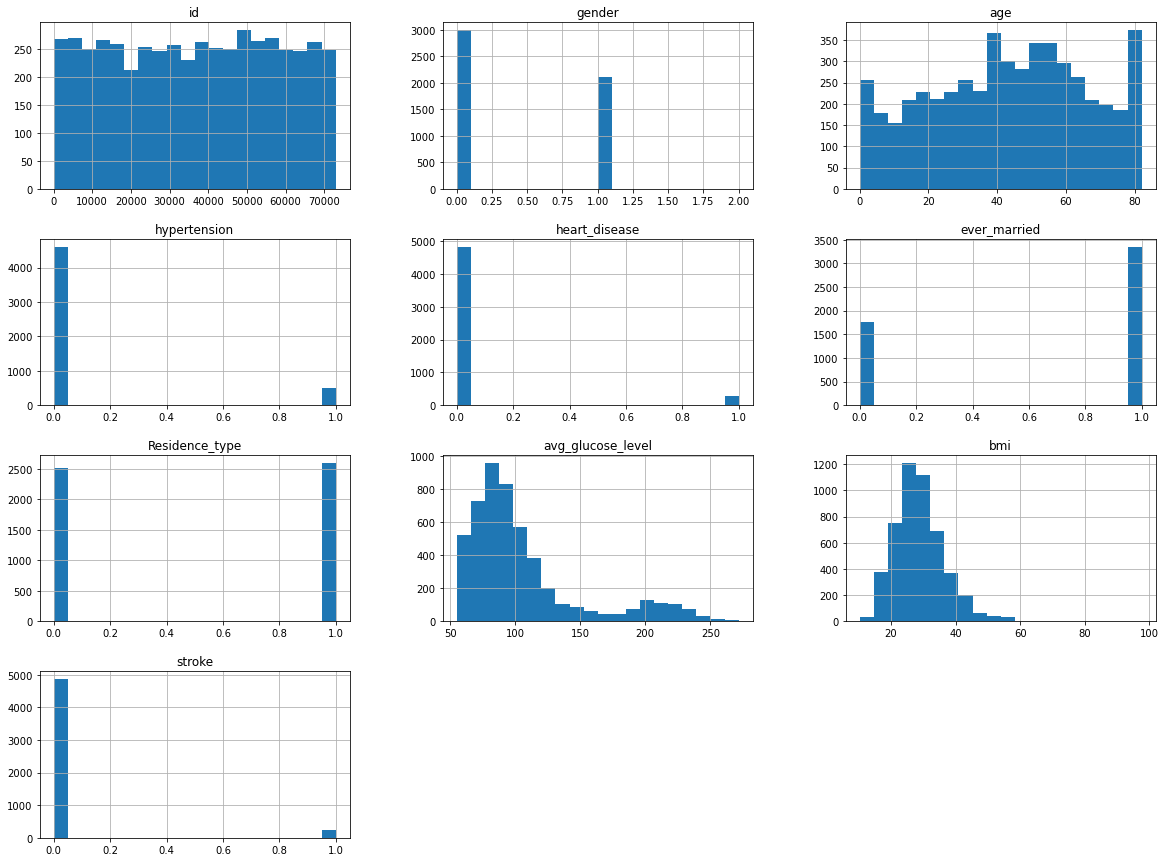

In [12]:
data.hist(bins=20, figsize=(20,15))
plt.show()

### Checking if data is balanced

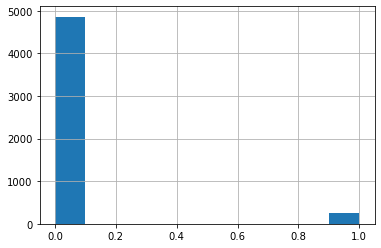

0    4861
1     249
Name: stroke, dtype: int64

In [13]:
data['stroke'].hist()
plt.show()
data['stroke'].value_counts()

-need to balance dataset so our classifer has equal number of both when training

### Analyzing feature correlations

In [14]:
corr_matrix = data.corr()
corr_matrix['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
Residence_type       0.015458
gender               0.008929
id                   0.006388
Name: stroke, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>],
       [<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='hypertension', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='age', ylabel='hypertension'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='hypertension'>,
 

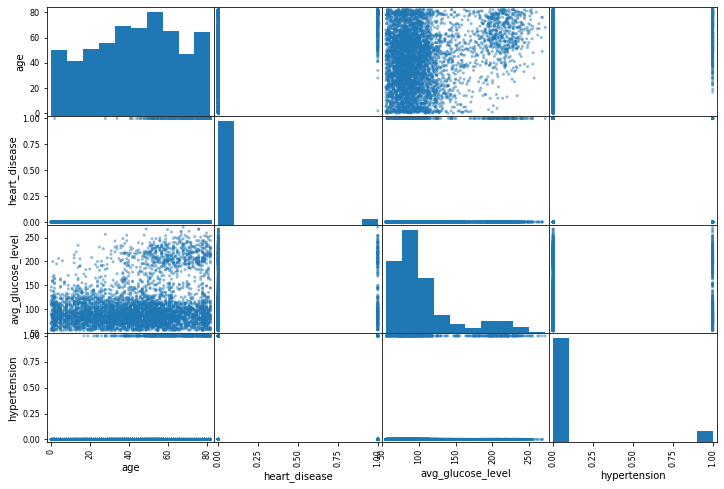

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["age", "heart_disease", "avg_glucose_level",
              "hypertension"]
scatter_matrix(data[attributes], figsize=(12, 8))

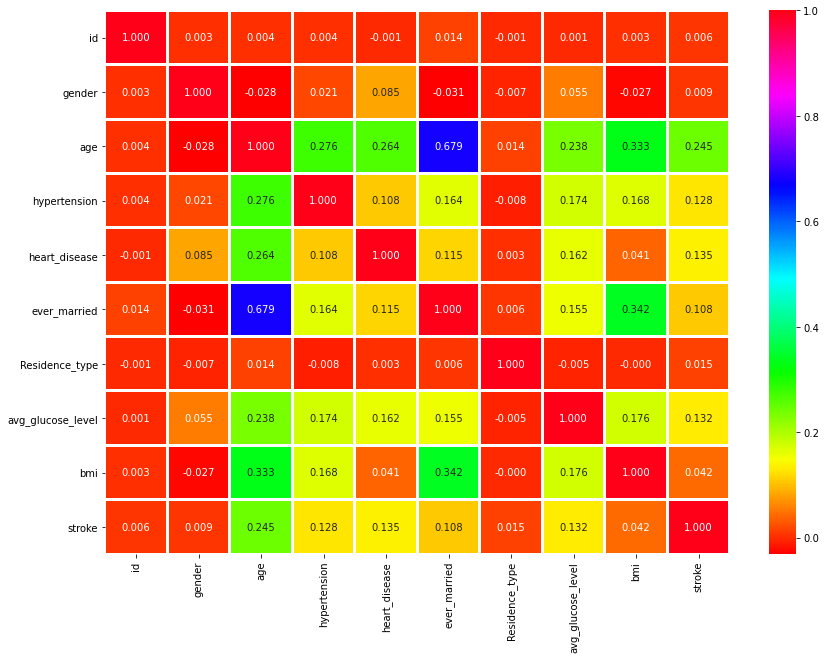

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [17]:
data["avg_glucose/age"] = data["avg_glucose_level"]/data["age"]
corr_matrix = data.corr()
corr_matrix['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
Residence_type       0.015458
gender               0.008929
id                   0.006388
avg_glucose/age     -0.031227
Name: stroke, dtype: float64

[Discuss correlations here] 

## Prepare the Data and run a KNN Model

In [18]:
data.drop("id", axis=1)
median = data["bmi"].median()
mean = data["bmi"].mean() 
data_1 = data
data_2 = data
data_3 = data #just in case we need it
data_1["bmi"].fillna(median, inplace=True)
data_2["bmi"].fillna(mean, inplace=True)
data_3["bmi"].fillna(mean, inplace=True)

In [19]:
data1_labels = data_1["stroke"].copy()
data1_features = data_1.drop("stroke", axis=1)
data1_features = data1_features.drop("id", axis=1)
data1_features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,avg_glucose/age
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,3.413284
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,3.314918
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1.324000
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,3.494490
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,2.204051


In [20]:
data3_labels = data_3["stroke"].copy()
data3_features = data_3.drop("stroke", axis=1)
data3_features = data3_features.drop("work_type", axis=1)
data3_features = data3_features.drop("smoking_status", axis=1)
data3_features = data3_features.drop("id", axis=1)
data3_features.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,avg_glucose/age
0,1,67.0,0,1,1,1,228.69,36.6,3.413284
1,0,61.0,0,0,1,0,202.21,28.1,3.314918
2,1,80.0,0,1,1,0,105.92,32.5,1.324000
3,0,49.0,0,0,1,1,171.23,34.4,3.494490
4,0,79.0,1,0,1,0,174.12,24.0,2.204051


In [21]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
avg_glucose/age      0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(data3_features, data3_labels, test_size=0.2)

print(X3_train.shape, y3_train.shape)
print(X3_test.shape, y3_test.shape)

(4088, 9) (4088,)
(1022, 9) (1022,)


In [23]:
# k-Nearest Neighbors algorithm
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier()
neigh.fit(X3_train, y3_train)
y3_hat = neigh.predict(X3_test)
print(accuracy_score(y3_test, y3_hat))

0.9461839530332681


Accuracy:    0.946184
Precision:   0.250000
Recall:      0.039216
F1 Score:    0.067797
Confusion Matrix: 



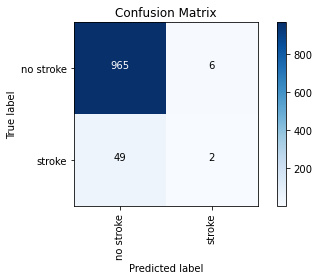

In [24]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y3_test, y3_hat)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y3_test, y3_hat)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y3_test, y3_hat)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y3_test, y3_hat)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y3_test, y3_hat, ['no stroke', 'stroke'])

In [25]:
print(y3_test)
y3_test.value_counts()

2715    0
333     0
260     0
2261    0
4992    0
       ..
1850    0
2417    0
211     1
1540    0
1118    0
Name: stroke, Length: 1022, dtype: int64


0    971
1     51
Name: stroke, dtype: int64

### KNN model but w/ pipelined data

### Pipeline:

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
data1_num = data1_features.drop(['work_type', 'smoking_status','hypertension','heart_disease','ever_married','Residence_type','gender'], axis=1) 

    
    # remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

data1_num_tr = num_pipeline.fit_transform(data1_num)
numerical_features = list(data1_num)
categorical_features = ['work_type', 'smoking_status','hypertension','heart_disease','ever_married','Residence_type','gender']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

data1_prepared = full_pipeline.fit_transform(data1_features)
print(data1_prepared)

[[ 1.05143428  2.70637544  1.00508597 ...  0.          1.
   0.        ]
 [ 0.78607007  2.12155854 -0.09898092 ...  1.          0.
   0.        ]
 [ 1.62639008 -0.0050283   0.47253605 ...  0.          1.
   0.        ]
 ...
 [-0.36384151 -0.51144264  0.22574463 ...  1.          0.
   0.        ]
 [ 0.34379639  1.32825706 -0.42370648 ...  0.          1.
   0.        ]
 [ 0.03420481 -0.46086746 -0.34577235 ...  1.          0.
   0.        ]]


In [27]:
# k-Nearest Neighbors algorithm
X1_train, X1_test, y1_train, y1_test = train_test_split(data1_prepared, data1_labels, test_size=0.2)
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(4088, 24) (4088,)
(1022, 24) (1022,)


In [28]:
# Accuracy
neigh1 = KNeighborsClassifier()
neigh1.fit(X1_train, y1_train)
y1_hat = neigh1.predict(X1_test)
print(accuracy_score(y1_test, y1_hat))

0.9530332681017613


Accuracy:    0.953033
Precision:   0.250000
Recall:      0.021739
F1 Score:    0.040000
Confusion Matrix: 



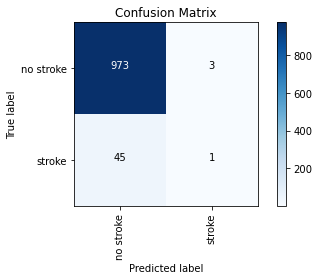

In [29]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y1_hat)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y1_hat)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y1_hat)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y1_hat)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y1_hat, ['no stroke', 'stroke'])

### Redoing previous experiement but w/ median for bmi null values instead of mean

In [30]:
data2_labels = data_2["stroke"].copy()
data2_features = data_2.drop("stroke", axis=1)
data2_features = data2_features.drop("id", axis=1)
data2_features = data2_features.drop("avg_glucose/age", axis=1)
data2_features.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
data2_num = data2_features.drop(['work_type', 'smoking_status','hypertension','heart_disease','ever_married','Residence_type','gender'], axis=1) 

    
    # remove categorical features from the numeric values

num2_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

data2_num_tr = num2_pipeline.fit_transform(data2_num)
numerical2_features = list(data2_num)
categorical2_features = ['work_type', 'smoking_status','hypertension','heart_disease','ever_married','Residence_type','gender']

full2_pipeline = ColumnTransformer([
        ("num", num2_pipeline, numerical2_features),
        ("cat", OneHotEncoder(categories='auto'), categorical2_features),
    ])

data2_prepared = full2_pipeline.fit_transform(data2_features)

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(data2_prepared, data2_labels, test_size=0.2)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)


(4088, 23) (4088,)
(1022, 23) (1022,)


Accuracy:    0.948141
Precision:   0.000000
Recall:      0.000000
F1 Score:    0.000000
Confusion Matrix: 



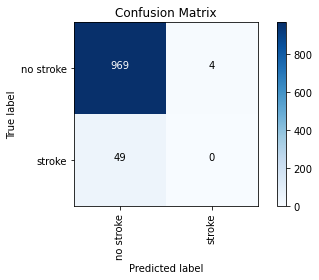

In [33]:
neigh2 = KNeighborsClassifier()
neigh2.fit(X2_train, y2_train)
y2_hat = neigh2.predict(X2_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y2_test, y2_hat)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y2_test, y2_hat)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y2_test, y2_hat)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y2_test, y2_hat)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y2_test, y2_hat, ['no stroke', 'stroke'])

In [325]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits = 10, random_state=42, shuffle=True)

KNN_kfold = KNeighborsClassifier(n_neighbors=10)

lgr_kfold_results = model_selection.cross_val_score(KNN_kfold, data2_features, data2_labels, cv=kfold)
svm_kfold_results = model_selection.cross_val_score(KNN_kfold, data1_prepared, data1_labels, cv=kfold)

print("KNN data2 w/ mean bmi Accuracy: %.2f%%" % (lgr_kfold_results.mean()*100.0))
print("KNN data1 w/ median bmi Accuracy: %.2f%%" % (svm_kfold_results.mean()*100.0))


/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn

KNN data2 w/ mean bmi Accuracy: nan%
KNN data1 w/ median bmi Accuracy: 95.13%


### Parameter Optimization for KNN w/o balancing

In [35]:
k_values = [1,2,3,5,7,9,10,20,50]

for i in k_values:
    neigh_k = KNeighborsClassifier(n_neighbors = i)
    neigh_k.fit(X1_train, y1_train)
    yk_hat = neigh_k.predict(X1_test)
    print("n_neighbors = {} has an accuracy of {}".format(i , accuracy_score(y1_test, yk_hat)))

n_neighbors = 1 has an accuracy of 0.9197651663405088
n_neighbors = 2 has an accuracy of 0.9530332681017613
n_neighbors = 3 has an accuracy of 0.9461839530332681
n_neighbors = 5 has an accuracy of 0.9530332681017613
n_neighbors = 7 has an accuracy of 0.9559686888454012
n_neighbors = 9 has an accuracy of 0.9540117416829745
n_neighbors = 10 has an accuracy of 0.9549902152641878
n_neighbors = 20 has an accuracy of 0.9549902152641878
n_neighbors = 50 has an accuracy of 0.9549902152641878


### Logistic Regression w/o balancing

Accuracy:    0.955969
Precision:   1.000000
Recall:      0.021739
F1 Score:    0.042553
Confusion Matrix: 



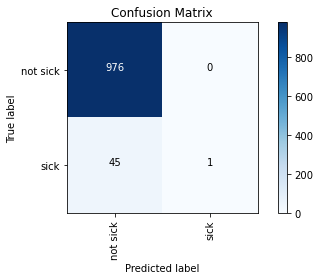

In [333]:
# Logistic Regression
log_reg = LogisticRegression(solver='sag',penalty='l2', max_iter=10000)
log_reg.fit(X1_train, y1_train)
y_hat1_LR = log_reg.predict(X1_test)
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat1_LR)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat1_LR)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat1_LR)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat1_LR)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat1_LR, ['not sick', 'sick'])

In [38]:
from sklearn import model_selection

lgr_kfold = LogisticRegression(penalty = 'l1', solver='liblinear')

lgr_kfold_results = model_selection.cross_val_score(lgr_kfold, data1_prepared, data1_labels, cv=kfold)

print("Logistic Regression Accuracy: %.2f%%" % (lgr_kfold_results.mean()*100.0))


Logistic Regression Accuracy: 95.15%


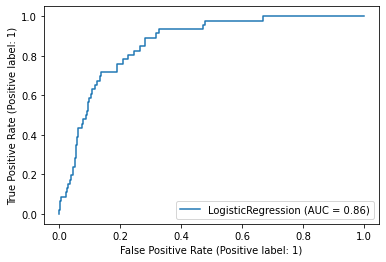

In [326]:
metrics.plot_roc_curve(log_reg, X1_test, y1_test)

## Balancing Dataset

In [40]:
!conda install imblearn.over_sampling -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - imblearn.over_sampling

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [41]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X1_train, y1_train)
# summarize class distribution
y_over.value_counts()

0    3885
1    3885
Name: stroke, dtype: int64

Accuracy:    0.740705
Precision:   0.126280
Recall:      0.804348
F1 Score:    0.218289
Confusion Matrix: 



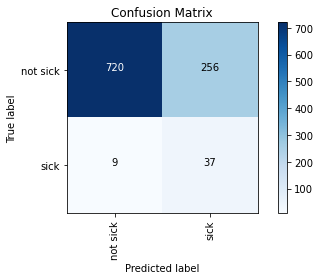

In [42]:
#Testing balanced data
log_reg = LogisticRegression(solver='liblinear',penalty='l1', max_iter=10000)
log_reg.fit(X_over, y_over)
y_hato_LR = log_reg.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hato_LR)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hato_LR)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hato_LR)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hato_LR)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hato_LR, ['not sick', 'sick'])

In [43]:
#Attempting diffrent method for balancing
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X1_train, y1_train)
# summarize class distribution
y_under.value_counts()

0    203
1    203
Name: stroke, dtype: int64

Accuracy:    0.718200
Precision:   0.126543
Recall:      0.891304
F1 Score:    0.221622
Confusion Matrix: 



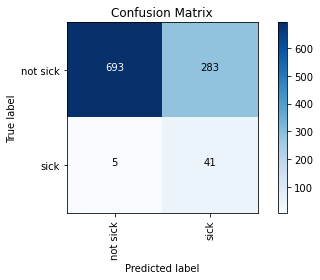

In [44]:
#Testing balanced data
log_reg = LogisticRegression(solver='liblinear',penalty='l1', max_iter=10000)
log_reg.fit(X_under, y_under)
y_hatu_LR = log_reg.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hatu_LR)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hatu_LR)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hatu_LR)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hatu_LR)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hatu_LR, ['not sick', 'sick'])

In [336]:
#Attempting TWO diffrent methods for balancing data
from imblearn.over_sampling import SMOTE, ADASYN

X1_resampled, y1_resampled = SMOTE().fit_resample(X1_train, y1_train)
X2_resampled, y2_resampled = ADASYN().fit_resample(X1_train, y1_train)
print(X1_resampled.shape, y1_resampled.shape)
print(y1_resampled.value_counts())
print(X2_resampled.shape, y2_resampled.shape)
print(y1_resampled.value_counts())

(7770, 24) (7770,)
0    3885
1    3885
Name: stroke, dtype: int64
(7776, 24) (7776,)
0    3885
1    3885
Name: stroke, dtype: int64


Accuracy:    0.742661
Precision:   0.127148
Recall:      0.804348
F1 Score:    0.219585
Confusion Matrix: 



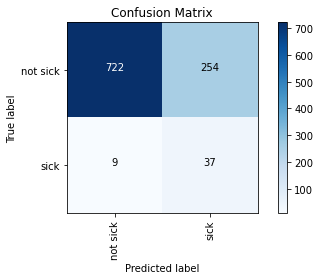

In [340]:
#Testing TWO balanced data sets using Logsitc Regression
log_reg = LogisticRegression(solver='liblinear',penalty='l1', max_iter=10000, random_state=1)
log_reg.fit(X1_resampled, y1_resampled)
y_hato1_LR = log_reg.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hato1_LR)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hato1_LR)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hato1_LR)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hato1_LR)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hato1_LR, ['not sick', 'sick'])

Accuracy:    0.737769
Precision:   0.125000
Recall:      0.804348
F1 Score:    0.216374
Confusion Matrix: 



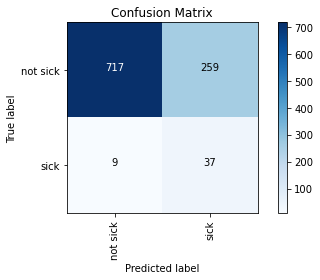

In [341]:
log_reg = LogisticRegression(solver='liblinear',penalty='l1', max_iter=10000, random_state=1)
log_reg.fit(X2_resampled, y2_resampled)
y_hato2_LR = log_reg.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hato2_LR)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hato2_LR)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hato2_LR)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hato2_LR)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hato2_LR, ['not sick', 'sick'])

### Training/optimizing best preforming balanced data on Logistic Regression 

Accuracy:    0.742661
Precision:   0.127148
Recall:      0.804348
F1 Score:    0.219585
Confusion Matrix: 



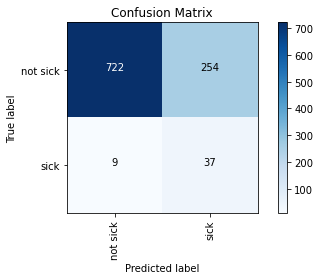

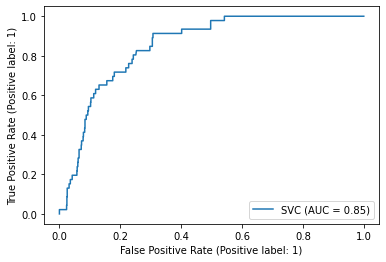

In [368]:
#Testing TWO balanced data sets
log_reg = LogisticRegression(solver='linear',penalty='l1', max_iter=10000, random_state=1)
log_reg.fit(X1_resampled, y1_resampled)
y_hato1_LR = log_reg.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hato1_LR)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hato1_LR)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hato1_LR)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hato1_LR)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hato1_LR, ['not sick', 'sick'])
metrics.plot_roc_curve(svm, X1_test, y1_test)

### Training/optimizing best preforming balanced data on KNN model 

0.7045009784735812
Accuracy:    0.704501
Precision:   0.107362
Recall:      0.760870
F1 Score:    0.188172
Confusion Matrix: 



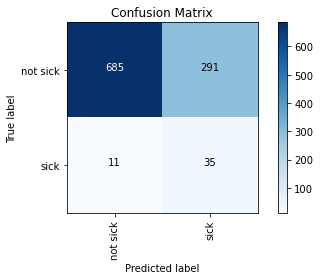

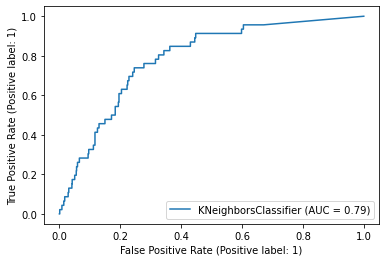

In [438]:
neigh1 = KNeighborsClassifier(weights='distance', n_neighbors=45)
neigh1.fit(X1_resampled, y1_resampled)
y1_hat = neigh1.predict(X1_test)
print(accuracy_score(y1_test, y1_hat))
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y1_hat)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y1_hat)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y1_hat)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y1_hat)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y1_hat, ['not sick', 'sick'])
metrics.plot_roc_curve(neigh1, X1_test, y1_test)

In [324]:
lgr_kfold = LogisticRegression(penalty = 'l1', solver='liblinear')

results1 = model_selection.cross_val_score(lgr_kfold, X_over, y_over, cv=kfold)
results2 = model_selection.cross_val_score(lgr_kfold, X_under, y_under, cv=kfold)
results3 = model_selection.cross_val_score(lgr_kfold, X1_resampled, y1_resampled, cv=kfold)
results4 = model_selection.cross_val_score(lgr_kfold, X2_resampled, y2_resampled, cv=kfold)

print("Logistic Regression Accuracy: %.2f%%" % (results1.mean()*100.0))
print("Logistic Regression Accuracy: %.2f%%" % (results2.mean()*100.0))
print("Logistic Regression Accuracy: %.2f%%" % (results3.mean()*100.0))
print("Logistic Regression Accuracy: %.2f%%" % (results4.mean()*100.0))

Logistic Regression Accuracy: 77.35%
Logistic Regression Accuracy: 77.10%
Logistic Regression Accuracy: 77.80%
Logistic Regression Accuracy: 77.28%


### Training balanced data on SVM (Support Vector Machine)

Accuracy:    0.954990
Precision:   0.000000
Recall:      0.000000
F1 Score:    0.000000
Confusion Matrix: 



/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


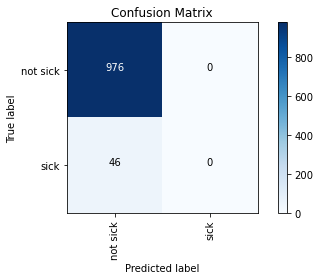

In [471]:
# SVM with unbalanced data
svm = SVC(probability = True)
svm.fit(X1_train, y1_train)
y_hat_svm = svm.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_svm)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_svm, ['not sick', 'sick'])


Accuracy:    0.813112
Precision:   0.135678
Recall:      0.586957
F1 Score:    0.220408
Confusion Matrix: 



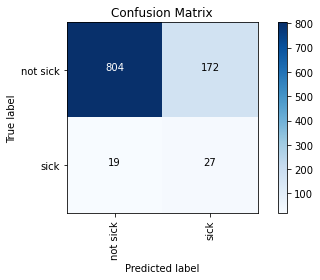

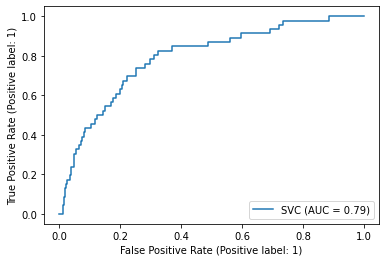

In [444]:
# SVM w/ balanced data
svm = SVC(probability = True)
svm.fit(X1_resampled, y1_resampled)
y_hat_svm = svm.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_svm)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_svm, ['not sick', 'sick'])
metrics.plot_roc_curve(svm, X1_test, y1_test)

Accuracy:    0.735812
Precision:   0.126667
Recall:      0.826087
F1 Score:    0.219653
Confusion Matrix: 



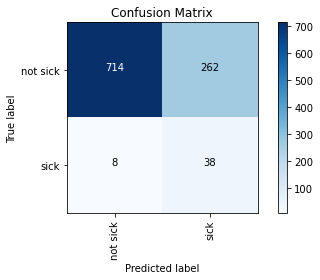

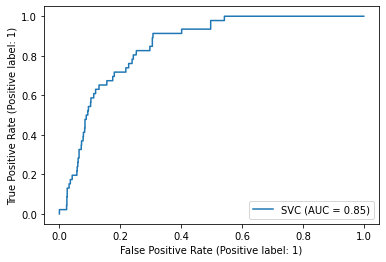

In [445]:
# SVM w/ balanced data and linear kernal 
svm = SVC(kernel='linear', probability = True)
svm.fit(X1_resampled, y1_resampled)
y_hat_svm = svm.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_svm)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_svm)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_svm, ['not sick', 'sick'])
metrics.plot_roc_curve(svm, X1_test, y1_test)

## Training using balanced data on Baysian (Statistical) Classification

Accuracy:    0.212329
Precision:   0.054054
Recall:      1.000000
F1 Score:    0.102564
Confusion Matrix: 



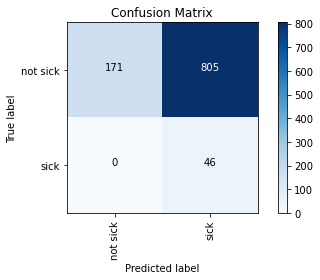

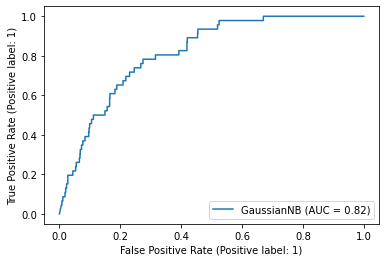

In [450]:
from sklearn.naive_bayes import GaussianNB

gNB = GaussianNB()
gNB.fit(X1_train, y1_train)
y_hat_gNB = gNB.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_gNB)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_gNB)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_gNB)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_gNB)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_gNB, ['not sick', 'sick'])

metrics.plot_roc_curve(gNB, X1_test, y1_test)

Accuracy:    0.264188
Precision:   0.057644
Recall:      1.000000
F1 Score:    0.109005
Confusion Matrix: 



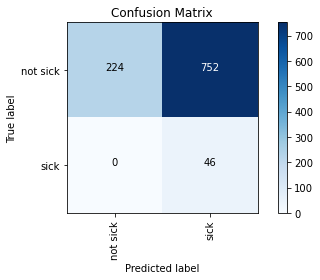

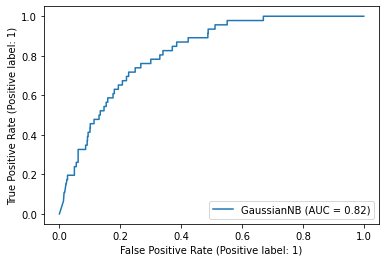

In [451]:
from sklearn.naive_bayes import GaussianNB

gNB = GaussianNB()
gNB.fit(X1_resampled, y1_resampled)
y_hat_gNB = gNB.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_gNB)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_gNB)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_gNB)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_gNB)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_gNB, ['not sick', 'sick'])
metrics.plot_roc_curve(gNB, X1_test, y1_test)

## Training using balanced data on Neural Network: MLP

Accuracy:    0.947162
Precision:   0.300000
Recall:      0.130435
F1 Score:    0.181818
Confusion Matrix: 



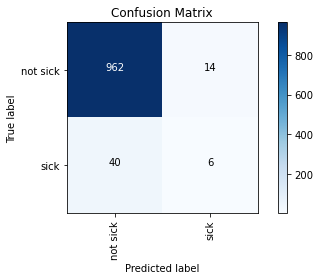

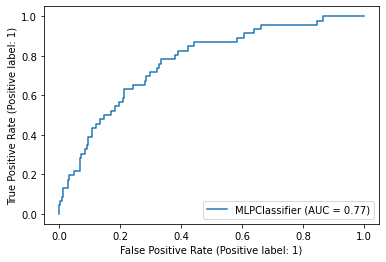

In [56]:
#Neural Network with unbalanced dataset
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(random_state=1, max_iter=1000).fit(X1_train, y1_train)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

Accuracy:    0.884540
Precision:   0.125000
Recall:      0.260870
F1 Score:    0.169014
Confusion Matrix: 



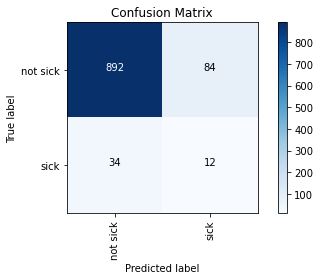

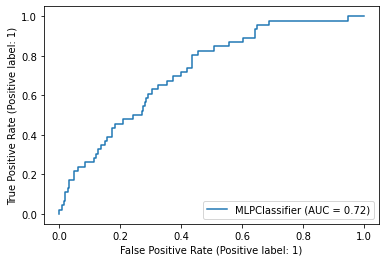

In [57]:
#Neural Network with over-balanced dataset
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(random_state=1, max_iter=5000).fit(X_over, y_over)
y_hat_RNN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_RNN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_RNN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_RNN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_RNN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_RNN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

Accuracy:    0.759295
Precision:   0.106299
Recall:      0.586957
F1 Score:    0.180000
Confusion Matrix: 



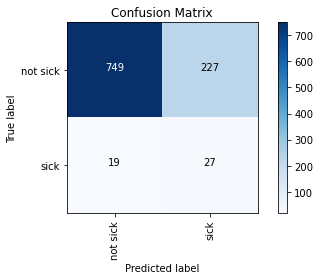

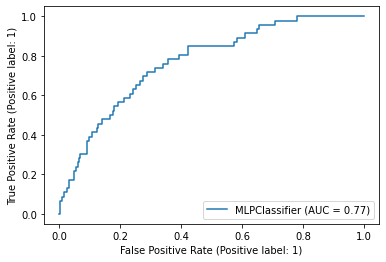

In [58]:
#MLP on resampled data w/ adam solver, relu activation, constant learning rate 

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(hidden_layer_sizes=10, random_state=1, max_iter=5000).fit(X1_resampled, y1_resampled)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

Accuracy:    0.744618
Precision:   0.122807
Recall:      0.760870
F1 Score:    0.211480
Confusion Matrix: 



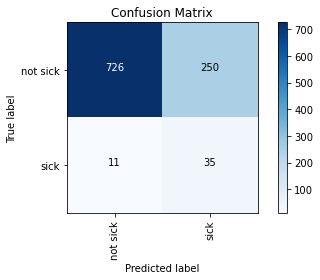

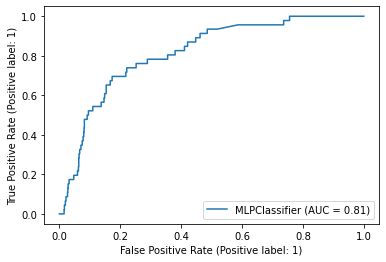

In [59]:
#MLP on resampled data w/ adam solver, relu activation, constant learning rate, less hidden layers

clf = MLPClassifier(hidden_layer_sizes=2, random_state=1, max_iter=5000).fit(X1_resampled, y1_resampled)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

Accuracy:    0.752446
Precision:   0.129032
Recall:      0.782609
F1 Score:    0.221538
Confusion Matrix: 



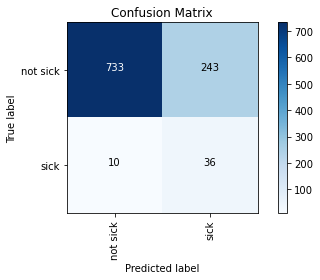

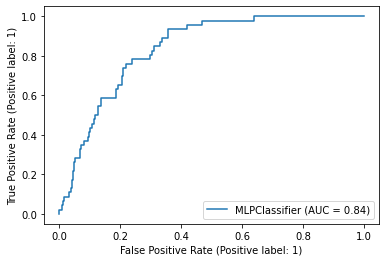

In [60]:
#MLP on resampled data w/ adam solver, logistic activation, constant learning rate 

clf = MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1, max_iter=5000).fit(X1_resampled, y1_resampled)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

Accuracy:    0.775930
Precision:   0.135458
Recall:      0.739130
F1 Score:    0.228956
Confusion Matrix: 



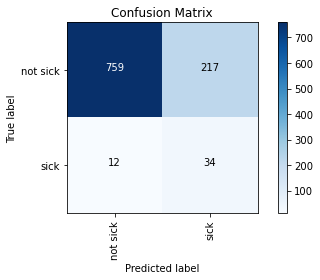

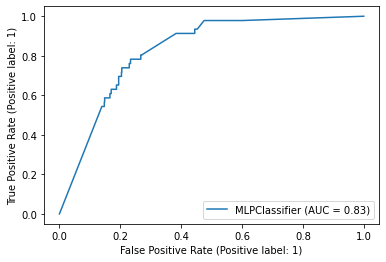

In [61]:
#MLP on resampled data w/ lbfgs, logistic activation, constant learning rate 

clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=2, random_state=1, max_iter=5000).fit(X1_resampled, y1_resampled)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

Accuracy:    0.740705
Precision:   0.131313
Recall:      0.847826
F1 Score:    0.227405
Confusion Matrix: 



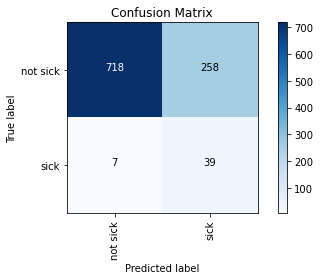

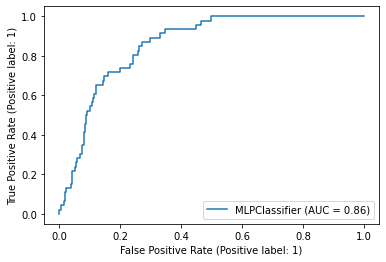

In [143]:
#MLP on resampled data w/ sgd solver, logistic activation, adaptive learning rate 
#BEST PERFORMING MODEL
clf = MLPClassifier(learning_rate='adaptive', solver='sgd', activation='logistic', hidden_layer_sizes=20, random_state=1, max_iter=5000).fit(X1_resampled, y1_resampled)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

Accuracy:    0.722114
Precision:   0.125786
Recall:      0.869565
F1 Score:    0.219780
Confusion Matrix: 



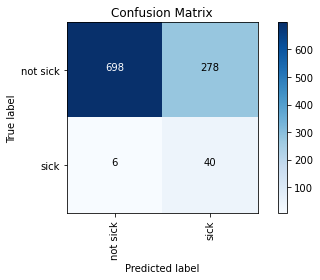

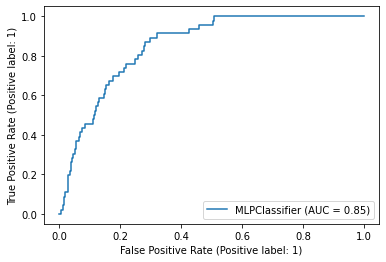

In [47]:
#MLP on resampled data w/ sgd solver, tanh activation, adaptive learning rate 

clf = MLPClassifier(learning_rate='adaptive', solver='sgd', activation='tanh', hidden_layer_sizes=2, random_state=1, max_iter=5000).fit(X1_resampled, y1_resampled)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

In [104]:
#Attempting to optimize paramaters of MLP using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'solver':('sgd', 'lbfgs','adam'), 'hidden_layer_sizes':[1,2,3,4,5,6,7,8,9,10,15,20,25], 'activation':('logistic','tanh','relu'), 'learning_rate':('constant','invscaling', 'adaptive')}
MLP = MLPClassifier(random_state=1, max_iter=5000)
#svc = svm.SVC()
clf = GridSearchCV(MLP, parameters, scoring='roc_auc')
clf.fit(X1_train, y1_train)
sorted(clf.cv_results_.keys())

/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed t

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_activation',
 'param_hidden_layer_sizes',
 'param_learning_rate',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [106]:
#continuation of optimization of parameters
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
         % (mean, std * 2, params))

0.539 (+/-0.103) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'solver': 'sgd'}
0.833 (+/-0.029) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.832 (+/-0.046) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'constant', 'solver': 'adam'}
0.401 (+/-0.115) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'invscaling', 'solver': 'sgd'}
0.833 (+/-0.029) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.832 (+/-0.046) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'invscaling', 'solver': 'adam'}
0.540 (+/-0.103) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.833 (+/-0.029) for {'activation': 'logistic', 'hidden_layer_sizes': 1, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.832 (+/-0.046) for {'activation'

Accuracy:    0.742661
Precision:   0.119298
Recall:      0.739130
F1 Score:    0.205438
Confusion Matrix: 



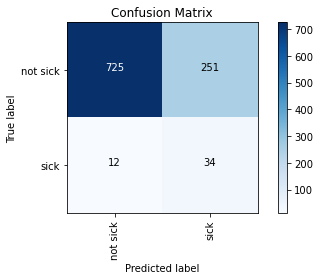

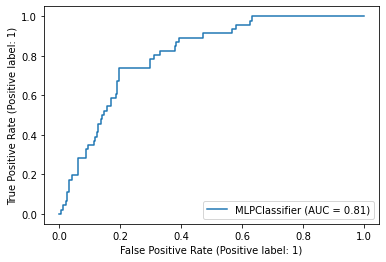

In [113]:
#Used the paramater results from gridSearchCV() to train on my balanced data and test on unbalanced below.
#Did not think peformance was any better, ignore this subsection as it was for testing purposes only

clf = MLPClassifier(learning_rate='adaptive', solver='adam', activation='tanh', hidden_layer_sizes=4, random_state=1, max_iter=5000).fit(X1_resampled, y1_resampled)
y_hat_NN = clf.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, X1_test, y1_test)

In [138]:
#KFOLD testing on best performing MLP model
kfold = model_selection.KFold(n_splits = 10, random_state=42, shuffle=True)

clf = MLPClassifier(learning_rate='adaptive', solver='sgd', activation='logistic', hidden_layer_sizes=20, random_state=1, max_iter=5000)

lgr_kfold_results = model_selection.cross_val_score(clf, X1_resampled, y1_resampled, cv=kfold)

print("KFOLD Cross Validation on best performing MLP model: %.2f%%" % (lgr_kfold_results.mean()*100.0))

KFOLD Cross Validation on best performing MLP model: 77.46%


## Training using balanced data on Random Forest Tree

In [294]:
#Testing diffrent parameters for random forest
from sklearn.ensemble import RandomForestClassifier

n_min=[10,11,13,14,15,17,20,22,25,30]
n_md=[4,5,6,7]
n_es=[2,3,4,5,6,7]

for k in n_min:
    for j in n_md:
        for i in n_es:
            print(k,j,i)
            RFC = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, random_state=1).fit(X1_resampled, y1_resampled)
            y_hat_RFC = RFC.predict(X1_test)

            print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_RFC)))
#print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_RFC)))
            print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_RFC)))
            print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_RFC)))

#print("Confusion Matrix: \n")
#draw_confusion_matrix(y1_test, y_hat_RFC, ['not sick', 'sick'])
#metrics.plot_roc_curve(RFC, X1_test, y1_test)


10 4 2
Accuracy:    0.742661
Recall:      0.826087
F1 Score:    0.224189
10 4 3
Accuracy:    0.740705
Recall:      0.847826
F1 Score:    0.227405
10 4 4
Accuracy:    0.736791
Recall:      0.869565
F1 Score:    0.229226
10 4 5
Accuracy:    0.730920
Recall:      0.869565
F1 Score:    0.225352
10 4 6
Accuracy:    0.723092
Recall:      0.869565
F1 Score:    0.220386
10 4 7
Accuracy:    0.719178
Recall:      0.847826
F1 Score:    0.213699
10 5 2
Accuracy:    0.725049
Recall:      0.782609
F1 Score:    0.203966
10 5 3
Accuracy:    0.758317
Recall:      0.847826
F1 Score:    0.240000
10 5 4
Accuracy:    0.739726
Recall:      0.847826
F1 Score:    0.226744
10 5 5
Accuracy:    0.734834
Recall:      0.826087
F1 Score:    0.219020
10 5 6
Accuracy:    0.734834
Recall:      0.826087
F1 Score:    0.219020
10 5 7
Accuracy:    0.735812
Recall:      0.826087
F1 Score:    0.219653
10 6 2
Accuracy:    0.724070
Recall:      0.739130
F1 Score:    0.194286
10 6 3
Accuracy:    0.764188
Recall:      0.826087


Accuracy:    0.762231
Precision:   0.141818
Recall:      0.847826
F1 Score:    0.242991
Confusion Matrix: 



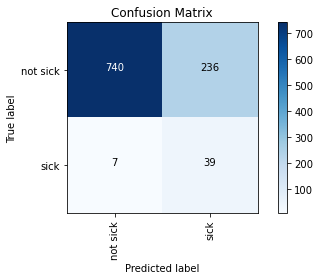

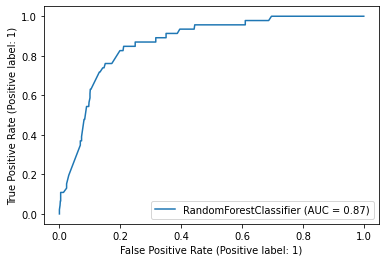

In [319]:
#Best random forest result below, parameters obtained from above
RFC = RandomForestClassifier(n_estimators=3, max_depth=6, min_samples_split=20, random_state=1).fit(X1_resampled, y1_resampled)
y_hat_RFC = RFC.predict(X1_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y1_test, y_hat_RFC)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y1_test, y_hat_RFC)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y1_test, y_hat_RFC)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y1_test, y_hat_RFC)))

print("Confusion Matrix: \n")
draw_confusion_matrix(y1_test, y_hat_RFC, ['not sick', 'sick'])
metrics.plot_roc_curve(RFC, X1_test, y1_test)


In [331]:
#KFOLD testing on best performing MLP model
kfold = model_selection.KFold(n_splits = 10, random_state=42, shuffle=True)

RFC = RandomForestClassifier(n_estimators=3, max_depth=6, min_samples_split=20, random_state=1).fit(X1_resampled, y1_resampled)

lgr_kfold_results = model_selection.cross_val_score(RFC, X1_resampled, y1_resampled, cv=kfold)

print("KFOLD Cross Validation on best performing RFC model: %.2f%%" % (lgr_kfold_results.mean()*100.0))

KFOLD Cross Validation on best performing RFC model: 83.02%


In [ ]:
#Attemping to optimize random forest tree using GridSearchCV method, ignore this its pretty useless :(
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split':[2,4,5,10],'n_estimators':[5,10,50], 'max_depth':[3,5,10]}
RFC = RandomForestClassifier()
#svc = svm.SVC()
clf = GridSearchCV(RFC, parameters, scoring='roc_auc')
clf.fit(X1_train, y1_train)
sorted(clf.cv_results_.keys())

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
0.799 (+/-0.054) for {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 5}
0.813 (+/-0.044) for {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}
0.829 (+/-0.036) for {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
0.781 (+/-0.045) for {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 5}
0.814 (+/-0.032) for {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.828 (+/-0.031) for {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.804 (+/-0.044) for {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 5}
0.817 (+/-0.025) for {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 10}
0.823 (+/-0.037) for {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
0.805 (+/-0.039) for {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 5}
0.821 (+/-0.040) for {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.826 (+/-0.032) for {'max_depth': 3, 

## Employing PCA and testing on best preforming models

In [469]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)

X1_PCA = pca.fit_transform(X1_resampled)
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X1_PCA, y1_resampled, test_size=0.2)
print(new_X_train.shape, new_y_train.shape)
print(new_X_test.shape, new_y_test.shape)

(6216, 10) (6216,)
(1554, 10) (1554,)


Accuracy:    0.801158
Precision:   0.758047
Recall:      0.882429
F1 Score:    0.815522
Confusion Matrix: 



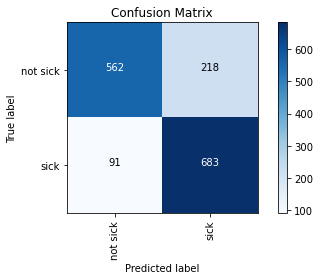

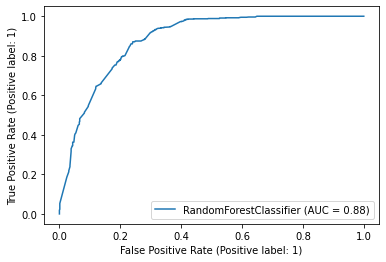

In [468]:
RFC = RandomForestClassifier(n_estimators=3, max_depth=6, min_samples_split=20, random_state=1).fit(new_X_train, new_y_train)
y_hat_RFC = RFC.predict(new_X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, y_hat_RFC)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, y_hat_RFC)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, y_hat_RFC)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, y_hat_RFC)))

print("Confusion Matrix: \n")
draw_confusion_matrix(new_y_test, y_hat_RFC, ['not sick', 'sick'])
metrics.plot_roc_curve(RFC, new_X_test, new_y_test)

Accuracy:    0.777349
Precision:   0.753968
Recall:      0.837531
F1 Score:    0.793556
Confusion Matrix: 



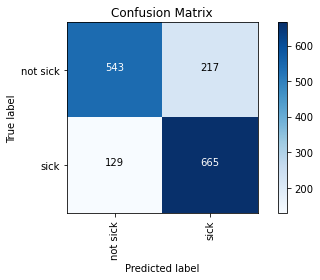

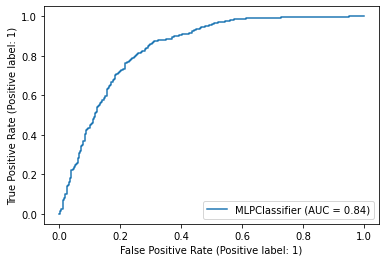

In [466]:
clf = MLPClassifier(learning_rate='adaptive', solver='sgd', activation='logistic', hidden_layer_sizes=20, random_state=1, max_iter=5000).fit(new_X_train, new_y_train)
y_hat_NN = clf.predict(new_X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, y_hat_NN)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, y_hat_NN)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, y_hat_NN)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, y_hat_NN)))

print("Confusion Matrix: \n")
draw_confusion_matrix(new_y_test, y_hat_NN, ['not sick', 'sick'])
metrics.plot_roc_curve(clf, new_X_test, new_y_test)